# Product Recommender System

- This Jupyter notebook demonstrates the development of a product recommendation system using Python's data science libraries. It leverages pandas for data manipulation, scikit-learn for machine learning tasks, and scipy for numerical computations. The core objective is to provide personalized product recommendations based on textual features and similarity measures.

### Data Preprocessing and Feature Extraction

- The notebook begins by importing necessary libraries, including pandas for handling datasets, and text processing utilities like regular expressions and normalization functions from the camel_tools library. The data undergoes preprocessing steps such as normalization and vectorization. Specifically, the TfidfVectorizer from scikit-learn transforms textual data into numerical vectors, capturing the importance of terms within the product descriptions. To reduce dimensionality and highlight latent semantic structures, Truncated Singular Value Decomposition (SVD) is applied, resulting in a more efficient representation of the data.

### Similarity Computation and Recommendation Generation

- With the processed feature vectors, the notebook calculates pairwise cosine similarity scores using functions from the scipy.sparse module. Cosine similarity measures the cosine of the angle between two vectors, effectively quantifying their similarity. Based on these similarity scores, the system identifies and ranks products that are most similar to a given product. The final output is a list of recommended products tailored to the user's input, facilitating an enhanced and personalized user experience.

## Importing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from camel_tools.utils.normalize import normalize_unicode


## Loading the Dataset

In [6]:
file_path ='C:\\Users\\Majed\\Downloads\\csv_for_case_study_V1.csv'
df = pd.read_csv(file_path)

## Displaying Basic Information

In [8]:
df.info()  # Provides an overview of the dataset 
df.head()  # Displays the first 5 rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         500000 non-null  int64 
 1   product_id    500000 non-null  int64 
 2   customer_id   500000 non-null  int64 
 3   product_name  500000 non-null  object
 4   Event_Date    477821 non-null  object
 5   Event         500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


,index,product_id,customer_id,product_name,Event_Date,Event
0,2112112,1,2726055,سائل غسيل للملابس طبيعي عدد 2 عبوة بحجم 1.8 لتر,2023-03-28 02:03:31+00:00,purchased
1,12110444,2,8307875,عطر 002,2023-02-07 23:23:49+00:00,cart
2,8908469,3,14308668,ريجليز بوبا بوبا شريط لبان علكة بنكهة الفراولة...,2023-03-16 20:37:03+00:00,cart
3,40921,4,13235575,ساعة يد رجالية M34-2,2023-02-22 17:27:47+00:00,cart
4,14635759,5,1652827,فوط تنظيف ميكروفايبر ريكسو - 6 حبات,2023-02-28 19:05:40+00:00,cart


In [9]:
# Checking Dataset Size

print("Total number of rows:", len(df))

Total number of rows: 500000


## Exploratory Data Analysis (EDA)

In [11]:
# Pre-compute Counts
product_id_counts = df['product_id'].value_counts()
product_name_counts = df['product_name'].value_counts()
customer_id_counts = df['customer_id'].value_counts()
event_counts = df['Event'].value_counts()


Unique Product IDs and their frequency (Top 10):
product_id
379     2556
126     2282
491     2128
274     1181
130     1115
1862     846
218      812
709      762
1290     708
565      688
Name: count, dtype: int64


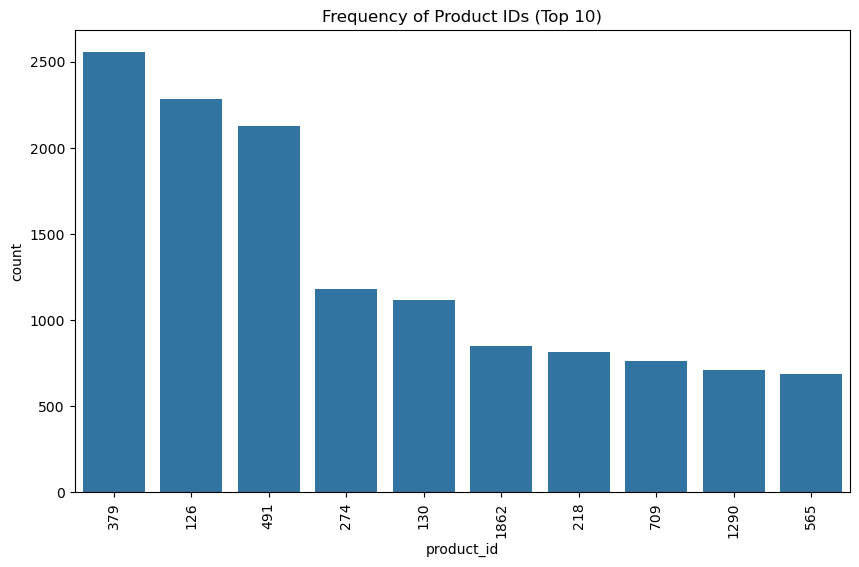

In [12]:
# 1. Unique Product IDs and their frequency (Top 10)
print("\nUnique Product IDs and their frequency (Top 10):")
top_10_products = product_id_counts.head(10)
print(top_10_products)
plt.figure(figsize=(10, 6))
sns.countplot(x='product_id', data=df, order=top_10_products.index)
plt.xticks(rotation=90)
plt.title('Frequency of Product IDs (Top 10)')
plt.show()


Unique Product Names and their frequency (Top 10):
product_name
عطر 379                                                  2556
عطر 491                                                  2128
ماكينة  لكامل الجسم للرجال والنساء لون أسود              1315
عطر 274                                                  1181
مناديل 500 مفرد                                          1129
ماكينة  لكامل الجسم للرجال والنساء لون أزرق غامق مميز    1073
حذاء شرقي مطرز                                            954
عطر 1862                                                  846
طرحة ربط سادة 4  ألوان                                    812
عطر 709                                                   762
Name: count, dtype: int64


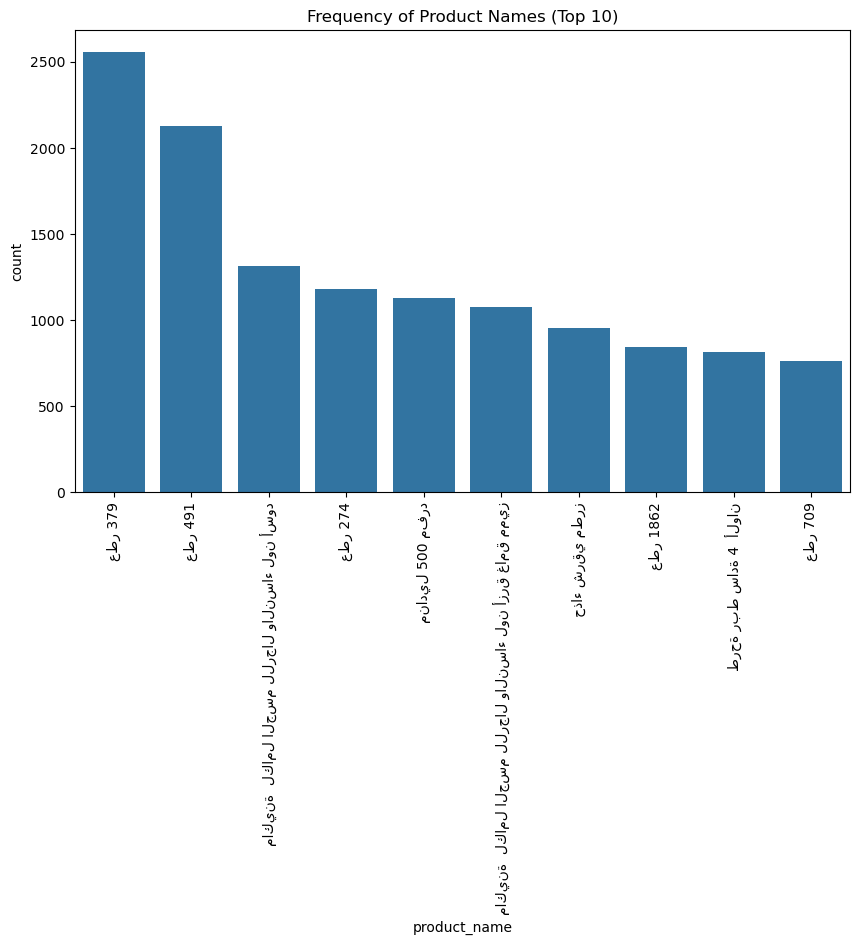

In [13]:
# 2. Unique Product Names and their frequency (Top 10)
print("\nUnique Product Names and their frequency (Top 10):")
top_10_product_names = product_name_counts.head(10)
print(top_10_product_names)
plt.figure(figsize=(10, 6))
sns.countplot(x='product_name', data=df, order=top_10_product_names.index)
plt.xticks(rotation=90)
plt.title('Frequency of Product Names (Top 10)')
plt.show()


Unique Customer IDs and their frequency (Distribution):


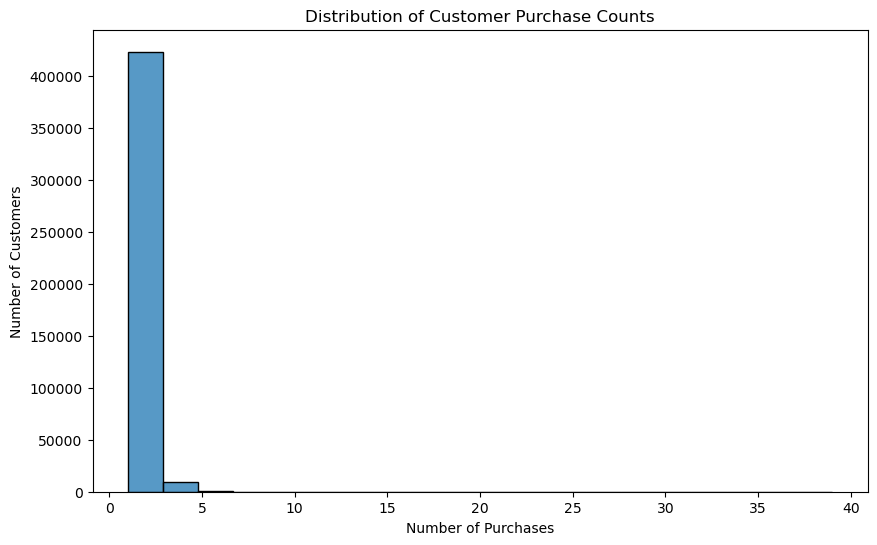

In [14]:
# 3. Unique Customer IDs and their frequency (Distribution)
print("\nUnique Customer IDs and their frequency (Distribution):")
plt.figure(figsize=(10, 6))
sns.histplot(customer_id_counts, bins=20)  
plt.title('Distribution of Customer Purchase Counts')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


Types of Events and their frequency:
Event
cart              305129
purchased         166423
wishlist           22179
search_keyword      3190
rating              3079
Name: count, dtype: int64


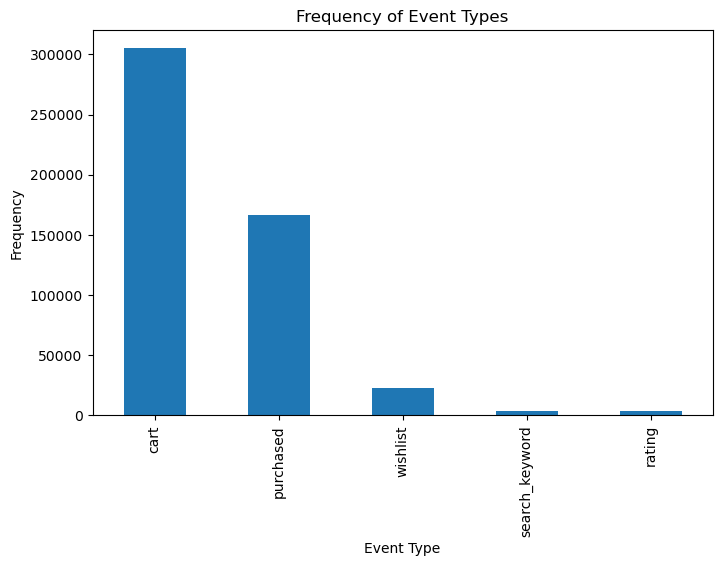

In [15]:
# 4. Types of Events and their frequency
print("\nTypes of Events and their frequency:")
print(event_counts)
plt.figure(figsize=(8, 5))
event_counts.plot(kind='bar')  # Use pre-computed counts
plt.title('Frequency of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

In [16]:
# 5. Event Date Analysis (if needed - using sampled data)
df['Event_Date'] = pd.to_datetime(df['Event_Date'])
print("\nEvent Date Analysis:")
print(df['Event_Date'].describe())


Event Date Analysis:
count                                 477821
mean     2023-02-07 16:54:52.963224576+00:00
min                2022-10-01 00:03:06+00:00
25%                2023-01-10 12:22:22+00:00
50%                2023-02-10 16:25:02+00:00
75%                2023-03-08 16:56:45+00:00
max                2023-03-31 23:59:52+00:00
Name: Event_Date, dtype: object


## Text Preprocessing: Removing Non-Arabic Characters & Performing Text Normalization

In [18]:
# Sampling (the data is quite big for a simple machine to handle matrix factorization and consine similarity)
sample_size = 100000  
df_sampled = df.sample(n=sample_size, random_state=42)  

In [19]:
# ==========================================
# Text Preprocessing: Removing Non-Arabic Characters
# ==========================================
def remove_non_arabic(text):
    # This regex keeps only characters in the Arabic Unicode block (\u0600-\u06FF) and spaces
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    return arabic_text.strip()

# Initialize the built-in ar2bw mapper from Camel Tools
#ar2bw_mapper = CharMapper.builtin_mapper('ar2bw')

In [20]:
# ==========================================
# Text Normalization
# ==========================================
# Define the preprocessing function that applies non-Arabic removal and then converts text using ar2bw
def preprocess_arabic_text(text):
    # Remove non-Arabic characters
    text_arabic = remove_non_arabic(text)
    # Map the Arabic text to its Buckwalter representation using ar2bw
    text_bw = normalize_unicode(text_arabic)
    return text_bw


In [21]:
# Apply the preprocessing function to the 'product_name' column and store results in a new column 'preprocessed_text'
df_sampled['preprocessed_text'] = df_sampled['product_name'].apply(preprocess_arabic_text)

In [22]:
df_sampled[['product_name']].head()

,product_name
104241,كحل شمعي ازرق نيلي
199676,عطر 7039
140199,عطر 848
132814,باكج اللبان العماني المسقى - Mini
408697,سماعة أرجوان برو


In [23]:
df_sampled[['preprocessed_text']].head()

,preprocessed_text
104241,كحل شمعي ازرق نيلي
199676,عطر
140199,عطر
132814,باكج اللبان العماني المسقى
408697,سماعة أرجوان برو


In [24]:
# Drop duplicates and handle missing values
df_sampled.drop_duplicates(subset=['product_id'], inplace=True) 
df_sampled = df_sampled[df_sampled['preprocessed_text'].notna()]

# Encode categorical event types
df_sampled['Event_encoded'] = df_sampled['Event'].astype('category').cat.codes

#df_sampled.drop_duplicates(subset=['preprocessed_text'], inplace=True) 

# Display cleaned data
df_sampled.head()

,index,product_id,customer_id,product_name,Event_Date,Event,preprocessed_text,Event_encoded
104241,1074513,51882,5834304,كحل شمعي ازرق نيلي,2022-11-07 02:27:41+00:00,search_keyword,كحل شمعي ازرق نيلي,3
199676,14782255,7039,2077836,عطر 7039,2023-03-28 22:23:04+00:00,cart,عطر,0
140199,14101671,848,14328136,عطر 848,2023-03-09 21:49:43+00:00,cart,عطر,0
132814,14401660,60917,10939648,باكج اللبان العماني المسقى - Mini,2023-02-05 13:52:05+00:00,cart,باكج اللبان العماني المسقى,0
408697,15799633,207,1217734,سماعة أرجوان برو,2023-03-14 08:52:34+00:00,cart,سماعة أرجوان برو,0


In [25]:
len(df_sampled)

60335

## Vectorizing Text Data using TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer instance (you can adjust parameters like ngram_range if needed)
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # using unigrams and bigrams can capture some context
tfidf_matrix = vectorizer.fit_transform(df_sampled['preprocessed_text'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (60335, 142618)


## Dimensionality Reduction using SVD

In [29]:
from sklearn.decomposition import TruncatedSVD
import scipy.sparse as sp

svd = TruncatedSVD(n_components=300, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

print("Reduced shape:", reduced_matrix.shape)

# - Reduces the number of features while retaining important information.
# - Helps in improving computational efficiency.

Reduced shape: (60335, 300)


## Computing Cosine Similarity

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix for all products
cosine_sim = cosine_similarity(reduced_matrix, reduced_matrix)

# Example: Inspect similarity between first few products
print("Cosine similarity for first product:", cosine_sim[0][:5])

Cosine similarity for first product: [ 1.00000000e+00  3.56076346e-14  3.56076346e-14  4.14394267e-02
 -3.36563164e-03]


## Recommendation Function

In [33]:
def get_recommendations(product_index, top_n=6, sim_threshold=0.6):
    # Get pairwise similarity scores for the given product
    print("product_index: ", product_index)
    sim_scores = list(enumerate(cosine_sim[product_index]))
    # Filter products with similarity above threshold and not the same product
    filtered_scores = [score for score in sim_scores if score[1] > sim_threshold and score[0] != product_index]
    # Sort products based on similarity score
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    # Select top_n recommendations
    product_indices = [i[0] for i in filtered_scores[:top_n]]
    return df_sampled.iloc[product_indices][['product_id', 'product_name']]

## Testing the Recommendation System

In [35]:
# Example: Get recommendations for random products
product_index=3312
original_product = df.loc[product_index, 'product_name']
recommended_products = get_recommendations(product_index=product_index)
    
print("Original Product:")
print(original_product)
print("\nSimilar Products:")
recommended_products.head()

product_index:  3312
Original Product:
توري بورش

Similar Products:


,product_id,product_name
80526,39755,خاتم نسائي
136709,76926,خاتم نسائي
290724,107084,خاتم Cartier نسائي
207870,105979,خاتم نسائي طرف الاصابع جمال لايوصف FS
125359,25279,خاتم نسائي زركون بتصميم ملفت


In [36]:
# Run a different rando test
product_index=1233
original_product = df.loc[product_index, 'product_name']
recommended_products = get_recommendations(product_index=product_index)
    
print("Original Product:")
print(original_product)
print("\nSimilar Products:")
recommended_products.head()

product_index:  1233
Original Product:
ويوو - ساعة ذكية WIWU SW01 الرياضية الترا - لون اسود باند اسود

Similar Products:


,product_id,product_name
196770,49002,تيشيرت ليفربول الاساسي
169699,20759,تيشيرت تشيلسي الاساسي 22/23
229364,114254,تيشيرت اسبانيا الاساسي
300716,2552,تيشيرت انجلترا الاساسي
199526,102756,تيشيرت يوفينتوس الاساسي 2020


## calculate_coverage
- Evaluate the recommendation model using a coverage test
- The coverage test shows the percentage of products have at least 6 recommendations with
similarity score > 0.6

In [38]:
def calculate_coverage(sim_threshold=0.6, required_recs=6):
    count = 0
    for i in range(cosine_sim.shape[0]):
        sim_scores = [score for score in cosine_sim[i] if score > sim_threshold and score != 1.0]
        if len(sim_scores) >= required_recs:
            count += 1
    coverage = (count / cosine_sim.shape[0]) * 100
    return coverage

print("Coverage:", calculate_coverage(), "%")


Coverage: 88.55059252506837 %


## Deployment 
- This was running successfully on local host and I performed the stess test on the local endpoint (results attached)
- However, due to using a free depolyment service to share it online, there was a memeory limit
- As a work around I deployed a ligher version that only has the first 5000 product just to be able to share a public link (https://product-recommender-system-pihf.onrender.com/)

In [40]:
import nest_asyncio
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import uvicorn

nest_asyncio.apply()  # Apply the workaround for Jupyter's event loop

app = FastAPI(title="Product Recommendation API")

class RecommendationRequest(BaseModel):
    product_index: int

@app.post("/recommendations")
def recommend_products(request: RecommendationRequest):
    try:
        recommendations = get_recommendations(request.product_index)
        return recommendations.to_dict(orient='records')
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Started server process [17872]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [17872]


## Testing with locust
- I also added the locustfile.py for testing the endpoing and it successfully managed 1000 users simultaneously (results attached)

# Limitations

### Data Volume:

Limitation: Only 20% of the data is used due to memory constraints.

Workaround: Scale infrastructure or distributed data to handle large scale (spark for example).

### Feature Extraction Approach:

Limitation: The model relies on TF-IDF, which may not capture deep semantic nuances.

Workaround: Explore dense embeddings (e.g., AraVec, FastText) for richer representations (tried to do these but due to memory constraints didn't succeed).

### Model Complexity:

Limitation: The model uses a simple cosine similarity-based model.

Workaround: Investigate advanced neural network architectures for improved recommendation accuracy.

### Feature Scope:

Limitation: The current model uses only textual features from product names, ignoring other signals.

Workaround: Integrate additional features like user interactions and product metadata to enhance recommendations (tried using that but due to time decided to submit this version withouth it).